In [1]:
import tensorflow as tf

In [129]:
import pandas as pd

df = pd.read_csv("data/songs/lyrics-data.csv")
df.head()

,ALink,SName,SLink,Lyric,language
0,/ivete-sangalo/,Arerê,/ivete-sangalo/arere.html,"Tudo o que eu quero nessa vida,\nToda vida, é\...",pt
1,/ivete-sangalo/,Se Eu Não Te Amasse Tanto Assim,/ivete-sangalo/se-eu-nao-te-amasse-tanto-assim...,Meu coração\nSem direção\nVoando só por voar\n...,pt
2,/ivete-sangalo/,Céu da Boca,/ivete-sangalo/chupa-toda.html,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,pt
3,/ivete-sangalo/,Quando A Chuva Passar,/ivete-sangalo/quando-a-chuva-passar.html,Quando a chuva passar\n\nPra quê falar\nSe voc...,pt
4,/ivete-sangalo/,Sorte Grande,/ivete-sangalo/sorte-grande.html,A minha sorte grande foi você cair do céu\nMin...,pt


In [130]:
df.drop(['ALink','SName','SLink'],axis=1,inplace=True)
df.head()

,Lyric,language
0,"Tudo o que eu quero nessa vida,\nToda vida, é\...",pt
1,Meu coração\nSem direção\nVoando só por voar\n...,pt
2,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,pt
3,Quando a chuva passar\n\nPra quê falar\nSe voc...,pt
4,A minha sorte grande foi você cair do céu\nMin...,pt


In [131]:
df.shape

(379931, 2)

In [132]:
df["language"].value_counts()

en     191814
pt     157393
es       9917
rw       1679
it       1432
fr       1225
de        844
fi        145
sv        112
ro         97
no         89
is         86
tl         69
pl         47
gl         36
ga         32
tr         32
id         26
cy         23
su         19
af         19
sw         19
ko         17
nl         14
da         13
ca         13
et         13
ms          8
ja          7
st          7
ht          5
gd          4
ru          4
ar          4
eu          4
cs          3
ku          3
ny          3
mg          3
lg          2
jw          2
hu          2
vi          1
iw          1
sr          1
hmn         1
hr          1
fa          1
sq          1
zh          1
lv          1
sl          1
Name: language, dtype: int64

In [133]:
# Building a model for only english songs
df = df[df["language"] == "en"]

In [134]:
# Taking only 1000 inputs for speed purposes
df = df[:1000]
df.shape

(1000, 2)

In [135]:
df['Number_of_words'] = df['Lyric'].apply(lambda x:len(str(x).split()))
df.head()

,Lyric,language,Number_of_words
69,I feel so unsure\nAs I take your hand and lead...,en,299
86,"Don't let them fool, ya\nOr even try to school...",en,161
88,"Baby, let's cruise, away from here\nDon't be c...",en,159
111,"Know it sounds funny\nBut, I just can't stand ...",en,175
140,You've got that look again\nThe one I hoped I ...,en,215


In [136]:
df['Number_of_words'].describe()

count    1000.000000
mean      434.681000
std       199.590394
min         8.000000
25%       293.000000
50%       419.000000
75%       548.000000
max      1495.000000
Name: Number_of_words, dtype: float64

Text(0.5, 1.0, 'Frequency distribution of number of words for each text extracted')

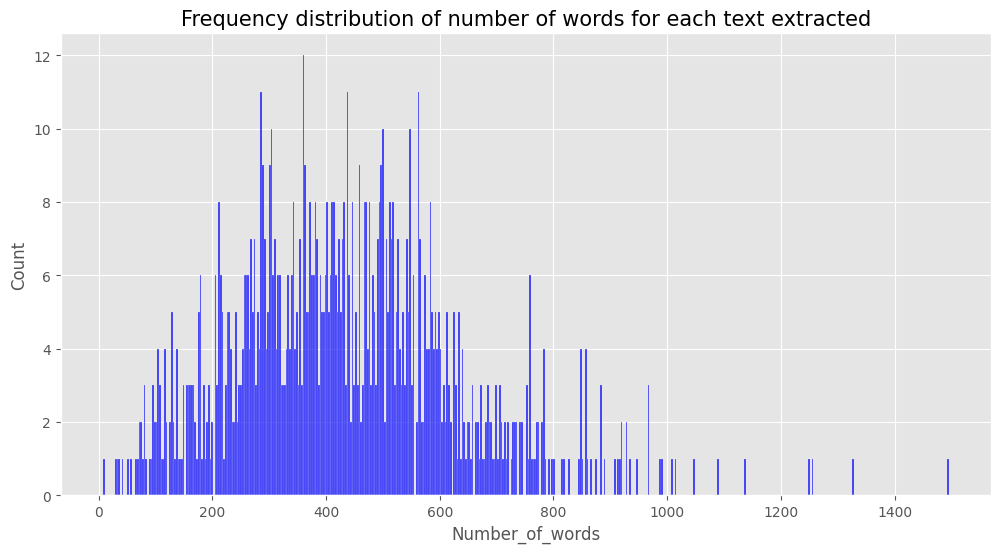

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
plt.figure(figsize=(12,6))
sns.histplot(df['Number_of_words'],kde = False,color="blue",bins=500)
plt.title("Frequency distribution of number of words for each text extracted", size=15)

In [113]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Lyric'].astype(str).str.lower())

total_words = len(tokenizer.word_index)+1
tokenized_sentences = tokenizer.texts_to_sequences(df['Lyric'].astype(str))
tokenized_sentences[0]

[3,
 56,
 24,
 259,
 187,
 3,
 71,
 15,
 260,
 13,
 261,
 1,
 4,
 2,
 57,
 262,
 187,
 2,
 58,
 263,
 188,
 16,
 15,
 117,
 264,
 4,
 95,
 19,
 265,
 266,
 13,
 50,
 145,
 267,
 268,
 9,
 32,
 41,
 57,
 20,
 146,
 147,
 51,
 42,
 52,
 148,
 118,
 37,
 17,
 4,
 149,
 3,
 33,
 43,
 59,
 19,
 119,
 150,
 151,
 120,
 44,
 4,
 152,
 19,
 121,
 13,
 153,
 2,
 154,
 5,
 83,
 96,
 155,
 24,
 9,
 32,
 41,
 57,
 20,
 2,
 21,
 3,
 156,
 72,
 1,
 97,
 157,
 32,
 269,
 2,
 270,
 271,
 18,
 19,
 189,
 121,
 4,
 2,
 122,
 13,
 95,
 272,
 12,
 273,
 190,
 52,
 274,
 16,
 2,
 275,
 98,
 12,
 50,
 191,
 158,
 9,
 32,
 41,
 57,
 20,
 146,
 147,
 51,
 42,
 52,
 148,
 118,
 37,
 17,
 4,
 149,
 3,
 33,
 43,
 59,
 19,
 119,
 150,
 151,
 120,
 44,
 4,
 152,
 19,
 121,
 13,
 153,
 53,
 154,
 5,
 83,
 96,
 155,
 24,
 9,
 32,
 41,
 57,
 20,
 2,
 21,
 3,
 156,
 72,
 1,
 32,
 276,
 15,
 22,
 123,
 2,
 58,
 192,
 24,
 277,
 3,
 278,
 5,
 25,
 45,
 159,
 53,
 279,
 280,
 37,
 120,
 53,
 21,
 193,
 281,
 194,
 195,
 

In [114]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

input_sequences = list()
for i in tokenized_sentences:
    for t in range(1, len(i)):
        n_gram_sequence = i[:t+1]
        input_sequences.append(n_gram_sequence)
        

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [115]:
input_sequences[:10]

array([[  0,   0,   0, ...,   0,   3,  56],
       [  0,   0,   0, ...,   3,  56,  24],
       [  0,   0,   0, ...,  56,  24, 259],
       ...,
       [  0,   0,   0, ...,  71,  15, 260],
       [  0,   0,   0, ...,  15, 260,  13],
       [  0,   0,   0, ..., 260,  13, 261]])

In [116]:
X = input_sequences[:,:-1]
Y = input_sequences[:,-1]

In [118]:
from tensorflow.keras.callbacks import EarlyStopping

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_words, 40, input_length=max_sequence_len-1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(250)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(total_words, activation='softmax'),
])


model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

earlystop = EarlyStopping(monitor='loss',
                          min_delta=0,
                          patience=5, 
                          verbose=0,
                          mode='auto')

history = model.fit(X, Y,
          epochs=20,
          callbacks=[earlystop], verbose=0)

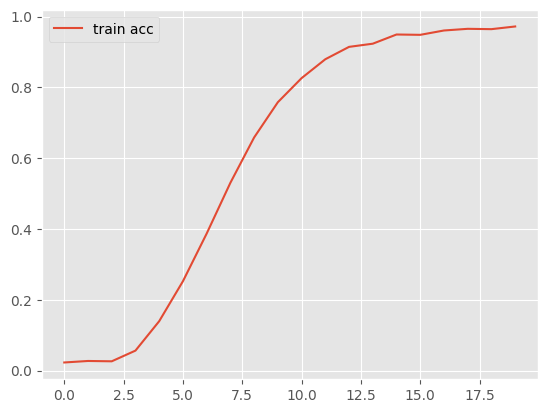

<Figure size 640x480 with 0 Axes>

In [119]:
plt.plot(history.history['accuracy'], label='train acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [138]:
def song_writer(input_text, next_words):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([input_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
        
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        input_text += " " + output_word
    return input_text

In [122]:
song_writer("This is my life", 30)

"This is my life to school ya oh no we've got a mind of our own so go to hell if what you re thinking is not right love would never leave us alone"

In [128]:
song_writer("This is the beginning", 50)

"This is the beginning world has changed the years spent before seem more cloudy than blue in many ways your baby's controlling when you haven't laid down for days for the poor no time to be thinking they're too busy finding ways and i you know i'd do most anything you want hey i"